In [34]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [35]:
df = pd.io.json.read_json('runs.json')
df

,car,weight,cg,wheelbase,graphite,lane,alignment,time
0,monkey brains,3.34,2.1,5,1,0,10.1,2.00
1,monkey brains,3.34,2.1,5,1,1,10.3,3.00
2,monkey brains,3.34,2.1,5,1,1,10.4,2.00
3,squirls in my pants,2.34,3.2,4,0,1,7.1,3.00
4,squirls in my pants,2.34,3.2,4,0,0,8.1,4.00
5,squirls in my pants,2.34,3.2,4,0,0,7.1,4.00
6,monkey brains,1.34,4.3,5,0,1,10.1,2.00
7,monkey brains,1.34,4.3,5,0,0,10.8,3.00
8,monkey brains,1.34,4.3,5,0,1,11.2,2.00
9,monkey brains,3.34,2.4,5,1,0,10.1,4.00


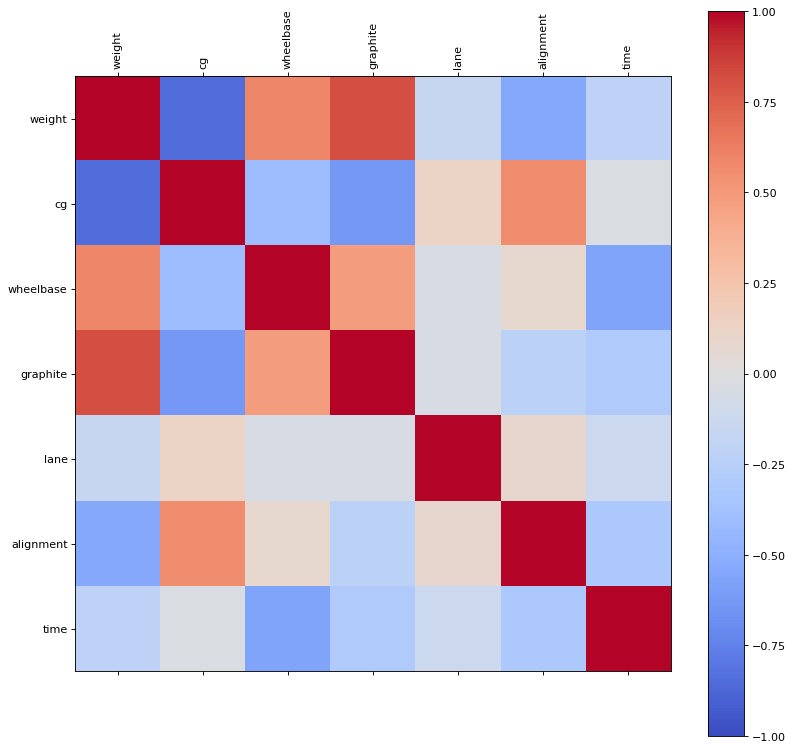

In [36]:
corr = df.corr()
fig = plt.figure(figsize=(12, 12), dpi=80)
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.show()

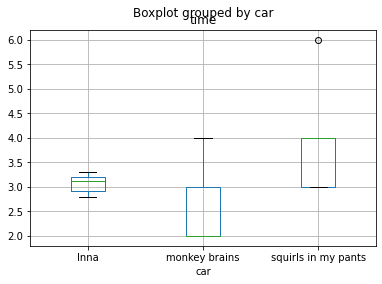

In [37]:
boxplot = df.boxplot(column=['time'], by='car')

,weight,cg,wheelbase,graphite,lane,alignment,time
car,,,,,,,
Inna,4.340000,1.600000,5.0,1.000000,0.428571,5.314286,3.065714
monkey brains,2.673333,2.933333,5.0,0.666667,0.555556,10.466667,2.444444
squirls in my pants,2.006667,3.100000,4.0,0.333333,0.555556,7.866667,3.777778


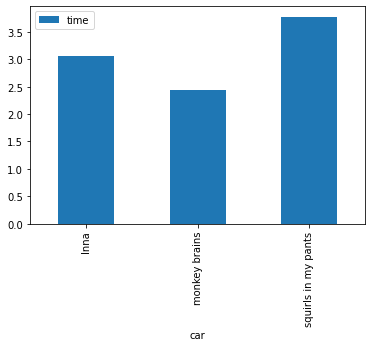

In [38]:
df.groupby(['car']).mean().plot.bar(y='time')
df.groupby(['car']).mean()

,weight,cg,wheelbase,graphite,lane,alignment,time
car,,,,,,,
Inna,4.34,1.6,5,1,0,5.1,2.8
monkey brains,1.34,2.1,5,0,0,9.1,2.0
squirls in my pants,1.34,2.6,4,0,0,7.1,3.0


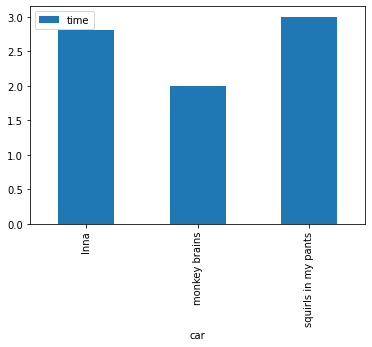

In [39]:
df.groupby(['car']).min().plot.bar(y='time')
df.groupby(['car']).min()

In [40]:
def Plot(xName, yName):
    x = np.array(df[xName])
    y = np.array(df[yName])
    slope, intercept, r, p, stderr = stats.linregress(x, y)

    fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
    ax.plot(x, y, linewidth=0, marker='.', label='{} vs {}'.format(yName, xName))
    label = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
    ax.plot(x, intercept + slope * x, label=label)
    ax.set_xlabel(xName)
    ax.set_ylabel(yName)
    ax.legend(facecolor='white')
    plt.show()


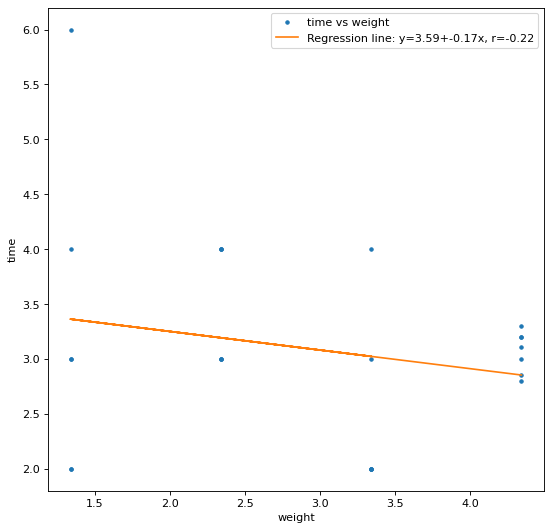

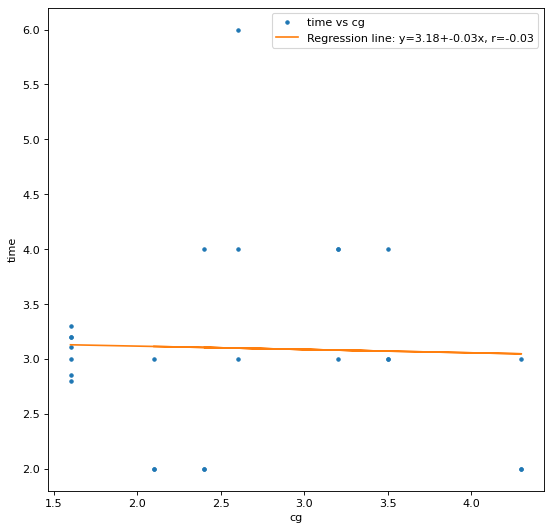

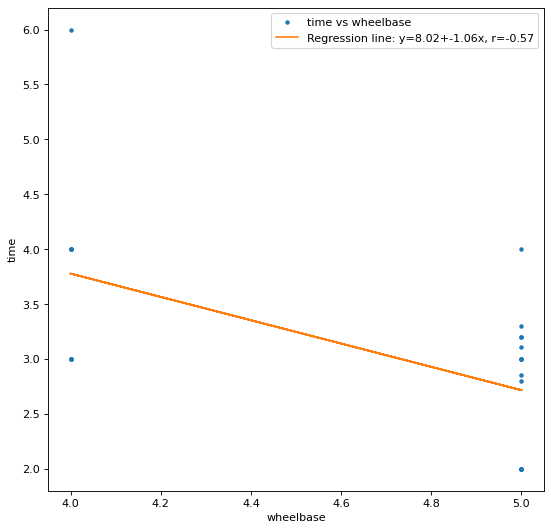

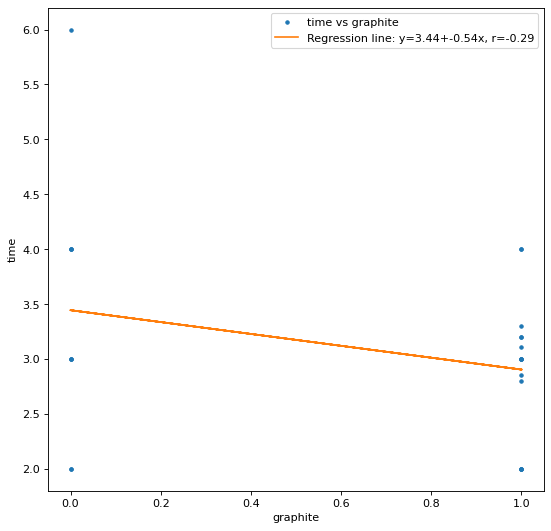

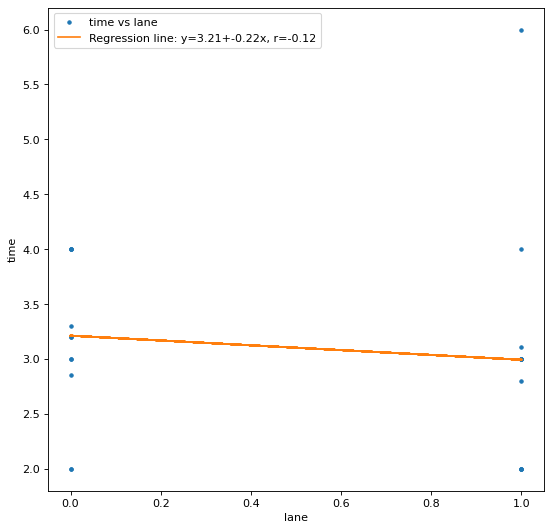

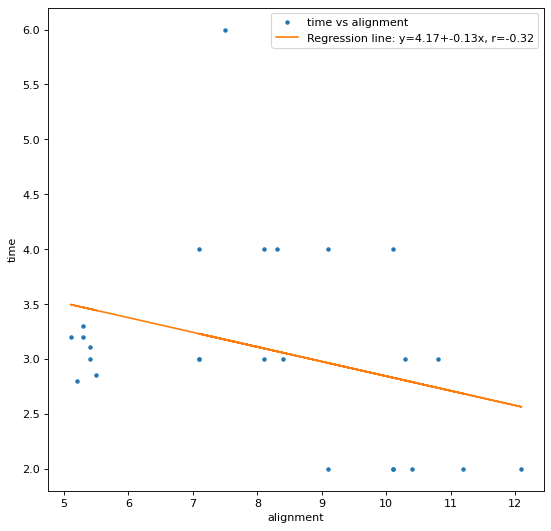

In [41]:
Plot('weight', 'time')
Plot('cg', 'time')
Plot('wheelbase', 'time')
Plot('graphite', 'time')
Plot('lane', 'time')
Plot('alignment', 'time')